# Exploratory Data Analysis

## Analyzing individual feature patterns using visualization

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = r'C:\Users\tingy\OneDrive\Python 3\Coursera\Data analysis\automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

%matplotlib inline 

### Continuous numerical variables ( Scatter plot)
Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type **"int64"** or **"float64"**. A great way to visualize these variables is by using **scatterplots with fitted lines**.

In order to start understanding the (linear) relationship between <ins>an individual variable</ins> and <ins>the price</ins>. We can do this by using `.regplot`, which plots the scatterplot plus the fitted regression line for the data.


#### Strong linear relationship ( good predictor)

##### Positive linear: close to +1

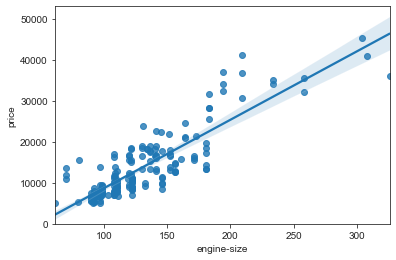

In [5]:
sns.regplot(x='engine-size', y='price', data=df) 
plt.ylim(0,) # boundary of y axis
plt.show()

In [6]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


>The diagonal elements are always +1 (best fit to itself)

##### Negative linear: close to -1

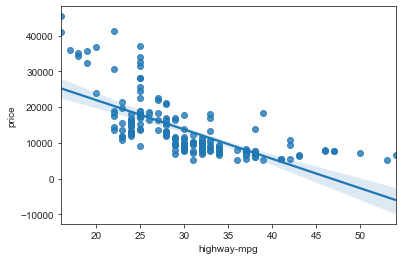

In [8]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.show()

In [9]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### Weak(No) linear relationship - close to 0

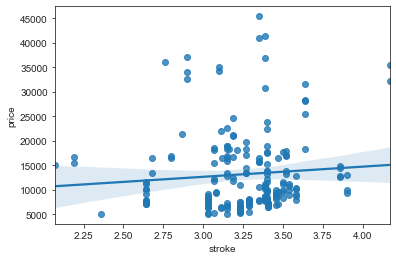

In [11]:
sns.regplot(x="stroke", y="price", data=df)
plt.show()

In [12]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


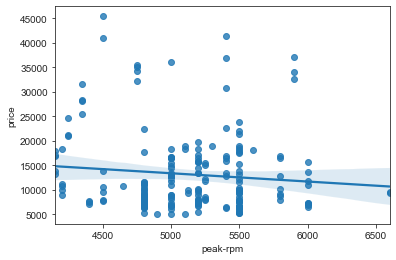

In [13]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.show()

In [14]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### Categorical variables ( Box plot)
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type **"object" or "int64"**. A good way to visualize categorical variables is by using **boxplots**.


#### Bad box plot predictor - overlap

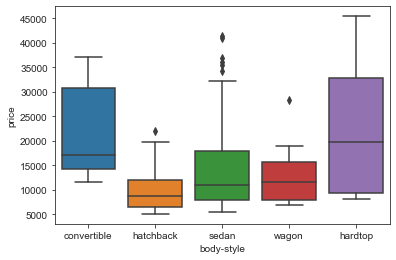

In [16]:
sns.boxplot(x="body-style", y="price", data=df)
plt.show()

#### Good box plot predictor - distinct

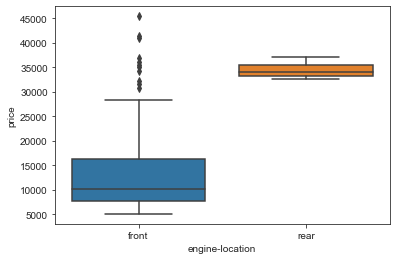

In [17]:
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

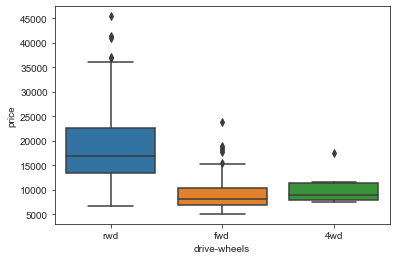

In [18]:
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()

## Descriptive Statistical Analysis

### `describe()`
- compute basic stats
- NaN will be automatically excluded

In [19]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


### `describe(include=object)`
- include categorical variables (string)

In [20]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


`top` means the data wit highest count<br>
`freq` means the freq of highest count

### `value_counts()` 
Value-counts is a good way of understanding how many units of each categorical variable we have.
- only works on <ins>**Pandas series**</ins>, not Pandas Dataframes
- As a result, we only include one bracket `df[]`
- not two brackets `df[[]]` - this is data frame 


#### Good predictor for regression

In [22]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts

,drive-wheels
fwd,118
rwd,75
4wd,8


In [23]:
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'

drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


#### Bad predictor for regression
3 with a rear engine and 198 with a front engine
- result is **skewed**

In [24]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'

engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


## Basic of grouping

### `groupby()`
This method groups data by different categories

#### 1. One column groupby

In [25]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [36]:
df_group_one = df[['drive-wheels', 'price']]
df_group_one

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
...,...,...
196,rwd,16845.0
197,rwd,19045.0
198,rwd,21485.0
199,rwd,22470.0


In [37]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


#### 2. Multiple columns groupby

In [38]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [39]:
df_gptest2 = df[['body-style','price']]

grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()

grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [40]:
df_gptest = df[['drive-wheels','body-style','price']]

grouped_test1 = df_gptest\
.groupby(['drive-wheels','body-style'],as_index=False)\
.mean()

grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### `groupby().pivot()` and `groupby().fillna()` 

In [41]:
# Pivot
grouped_pivot = grouped_test1\
.pivot(index='drive-wheels',columns='body-style')

grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [42]:
#fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 

grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Heatmap
Let's visualize the relationship between Body Style vs Price.

### `plt.pcolor([X,Y], cmap='PuOr')`
Divergent colormaps: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., RdBu or PuOr).

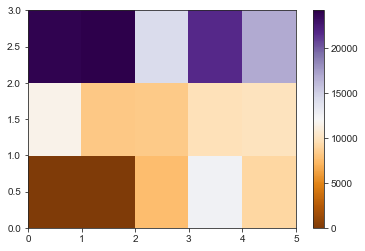

In [43]:
# general heatmap
plt.pcolor(grouped_pivot, cmap='PuOr')
plt.colorbar()
plt.show()

In [45]:
grouped_pivot.columns

MultiIndex([('price', 'convertible'),
            ('price',     'hardtop'),
            ('price',   'hatchback'),
            ('price',       'sedan'),
            ('price',       'wagon')],
           names=[None, 'body-style'])

In [55]:
grouped_pivot.columns.levels[1]

Index(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], dtype='object', name='body-style')

In [54]:
grouped_pivot.index

Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')

In [51]:
# (drive-wheel, body-style) - rows , columns
grouped_pivot.shape

(3, 5)

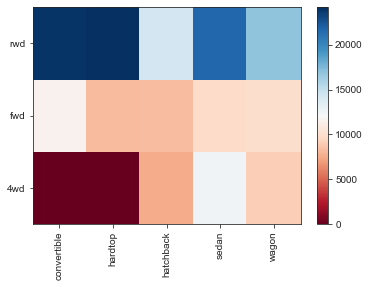

In [72]:
ax = plt.gca()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5,
              minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5,
              minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

# colorbar
plt.colorbar(im)

plt.show()

## Correlation and Causation
**Correlation**: a measure of the extent of interdependence between variables.

**Causation**: the relationship between cause and effect between two variables.

Note: correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.

**Pearson Correlation**

The Pearson Correlation measures the **linear dependence** between two variables X and Y (_int64_ or _float64_).<br>
The resulting ***coefficient** is a value between -1 and 1 <ins>**inclusive**</ins>, where:
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

**P-value**

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [73]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


### `scipy` module - Correlation  coefficient & P-value

In [74]:
from scipy import stats

#### 1. Wheel-base vs Price

In [75]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], 
                                       df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef,
      "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508 
with a P-value of P = 8.076488270733218e-20


p-value above is <0.001, which the correlation between wheel-base and price is statistically significant <br>although the linear relationship isn't extremely strong (~0.585)

#### 2.Horsepower vs Price

In [76]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], 
                                       df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef,
      "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559 
with a P-value of P = 6.369057428260101e-48


p-value above is <0.001, which the correlation between horsepower and price is statistically significant
<br>and the linear relationship is quite strong (~0.809, close to 1)

#### 3. Length vs Price

In [77]:
pearson_coef, p_value = stats.pearsonr(df['length'], 
                                       df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef,
      "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638 
with a P-value of P = 8.016477466159556e-30


p-value is <0.001, which the correlation between horsepower and price is statistically significant
<br>and the linear relationship is moderately strong (~0.691, close to 1)

#### 4. Width vs Price

In [78]:
pearson_coef, p_value = stats.pearsonr(df['width'], 
                                       df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef,
      "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7512653440522672 
with a P-value of P = 9.20033551048217e-38


p-value is <0.001, which the correlation between horsepower and price is statistically significant
<br>and the linear relationship is quite strong (~0.751, close to 1)

#### 5. Curb-weight vs Price

In [79]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], 
                                       df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef,
      "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843 
with a P-value of P = 2.189577238894065e-53


p-value is <0.001, which the correlation between horsepower and price is statistically significant
<br>and the linear relationship is quite strong (~0.834, close to 1)

#### 6. Engine size vs Price

In [80]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], 
                                       df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef,
      "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8723351674455182 
with a P-value of P = 9.265491622200232e-64


p-value is <0.001, which the correlation between horsepower and price is statistically significant
<br>and the linear relationship is quite strong (~0.872, close to 1)

#### 7. Bore vs Price

In [81]:
pearson_coef, p_value = stats.pearsonr(df['bore'], 
                                       df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef,
      "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5431553832626603 
with a P-value of P = 8.049189483935261e-17


p-value is <0.001, which the correlation between horsepower and price is statistically significant
<br>and the linear relationship is moderate (~0.872)

#### 8. City-mpg vs Price

In [82]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], 
                                       df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef,
      "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678 
with a P-value of P = 2.321132065567641e-29


p-value is <0.001, which the correlation between city-mpg and price is statistically significant
<br>and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

#### 9. High-way vs Price

In [83]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], 
                                       df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef,
      "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.704692265058953 
with a P-value of P = 1.7495471144476358e-31


p-value is <0.001, which the correlation between city-mpg and price is statistically significant
<br>and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

## Anova: Analysis of Variance
The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are <ins>**significant differences between the means of two or more groups**</ins>. ANOVA returns two parameters:<br>

**F-test score**: ANOVA assumes the means of all groups are the same, <ins>**calculates how much the actual means deviate from the assumption**</ins>, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**:  P-value tells how statistically significant is our calculated score value.

If our price variable is **strongly correlated** with the variable we are analyzing, expect ANOVA to return a **sizeable F-test score** and a **small p-value**.


In [84]:
df_gptest.head(2)

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0


In [85]:
grouped_test2=df_gptest[['drive-wheels', 'price']]\
            .groupby(['drive-wheels'])

grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


### F-test and P value
use `stats.f_oneway()` to get F-test and P valuec (ANOVA algorithm averages the data automatically)

In [94]:
print(grouped_test2.get_group('fwd').head(2),"\n")
print(grouped_test2.get_group('rwd').head(2), "\n")
print(grouped_test2.get_group('4wd').head(2))

  drive-wheels    price
3          fwd  13950.0
5          fwd  15250.0 

  drive-wheels    price
0          rwd  13495.0
1          rwd  16500.0 

    drive-wheels    price
4            4wd  17450.0
136          4wd   7603.0


#### 1. fwd and rwd and 4wd

In [89]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                              grouped_test2.get_group('rwd')['price'],
                              grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


large F-test score shows a strong correlation<br>
P-value ~0 implies almost certain statistical significance

#### 2. fwd and rwd

In [95]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                              grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### 3. 4wd and rwd

In [96]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'],
                              grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


#### 4. 4wd and fwd

In [97]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'],
                              grouped_test2.get_group('fwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


## Conclusion:
<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>
